# 3.1 线性基函数模型

之前我们一直在考虑概率密度估计这样的非监督问题。现在我们考虑监督问题，从简单的回归问题开始。

对于回归问题，我们有一个 $D$ 维的输入 $\sf x$，和一个或多个连续的目标输出 $\sf t$。在第一章我们遇到了多项式回归的问题，现在我们扩展这个问题，利用一组固定的非线性基函数的线性组合，得到一个线性回归模型。

### 问题设定

假设我们有 $N$ 个观测数据 $\{\mathbf x_n\}, n=1,\dots, N$，以及对应的目标值 $\{t_n\}$，我们的目标是对于预测 $\bf x$ 对应的目标值 $t$。

之前的讨论我们知道，最简单的方法是找到一个函数 $y(\mathbf x)$，使得 $y(\mathbf x)$ 的值能够很好的模拟 $t$。

从概率的角度来说，我们希望对 $p(t|\mathbf x)$ 进行建模，因为对于 $\mathbf x$ 来说，$t$ 具有一定的不确定性。

### 线性基函数模型

最简单的线性回归模型即输入数据的线性组合：

$$
y(\mathbf{x,w}) = w_0 + w_1x_1 + \cdots + w_Dx_D
$$

其中 $\mathbf x = (x_1,\dots,x_D)^\top$，这就是简单的线性回归模型（`linear regression`）。

它是参数 $w_0, w_1, \dots, w_D$ 的一个线性组合（当然，它也是 $\bf x$ 的线性组合，但是这限制了我们的模型）。基于这个性质，我们将这个线性回归进行扩展，变成一组关于 $\mathbf x$ 的非线性函数的线性组合：

$$
y(\mathbf{x,w}) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(\mathbf x)
$$

这里 $\phi_j(\mathbf x)$ 就是所谓的基函数（`basis function`）。这里限制 $w$ 的下标最大为 $M-1$，表示我们的参数数目为 $M$

$w_0$ 通常叫做偏置项（`bias`）（注意不要跟统计中的 `bias` 混淆，统计中它指的是一个估计量偏离其均值的程度），对任何输入它的作用都是一样的。

通常为了方便，我们定义 $\phi_0(\mathbf x)=1$，这样我们得到：

$$
y(\mathbf{x,w}) = \sum_{j=0}^{M-1} w_j \phi_j(\mathbf x) = \mathbf{w^\top \phi(x)}
$$

其中 $\mathbf w = (w_0,\dots,w_{M-1})^\top$，$\mathbf \phi=(\phi_0,\dots,\phi_{M-1})^\top$。

在很多应用中，我们通常会对原始输入进行一些预处理或者特征选择，这些得到的特征可以被认为是基函数 $\{\phi_j(\mathbf x)\}$。

虽然我们的模型叫做线性基函数模型（`linear basis function models`），但这个模型事实上可以是非线性的；它的线性体现在参数 $\mathbf w$ 上。

在之前的多项式函数模型中，我们相当于选择了这样的基函数 $\phi_j = x^j$。多项式拟合的一个局限在于，这个函数是一个输入变量的全局函数，因此在一个区域内数据点的改变会影响到其他所有区域。为此，我们可以考虑将输入空间划分成多个区域，然后在这些区域内使用不同的多项式拟合模型，这就是所谓 `spline` 函数的想法。

常用的基函数有高斯基函数：

$$
\phi_j(x) = \exp\left\{-\frac{x-\mu_j}{2s^2}\right\}
$$


sigmoid 基函数：


$$
\phi_j(x) = \sigma\left\{\frac{x-\mu_j}{s}\right\}
$$

其中

$$
\sigma(a)=\frac{1}{1+\exp(-a)}
$$

等价的我们还可以用 tanh 函数，因为 $\tanh(a) = 2\sigma(a)-1$，所以 sigmoid 函数的线性组合与 tanh 函数的线性组合是等效的。

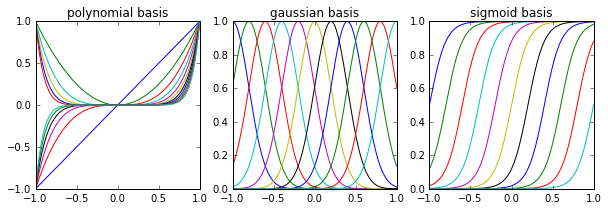

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

_, axes = plt.subplots(1, 3, figsize=(10, 3))

tt = np.linspace(-1, 1, 200)

for s in np.arange(1, 11.5, 1):
    axes[0].plot(tt, tt ** s)
    axes[1].plot(tt, np.exp(-(tt - (s - 6)/5.0) ** 2 / (2 * 0.04)))
    axes[2].plot(tt, 1.0 / (1 + np.exp(-(tt - (s - 6)/5.0) / 0.1)))


axes[0].set_title('polynomial basis')
axes[1].set_title('gaussian basis')
axes[2].set_title('sigmoid basis')

plt.show()

另一个常用的基函数是傅里叶基，对应于一组三角函数的展开，每个基函数代表一种特定的频率成分，如果我们在空间和频率上对其进行限制，我们可以得到小波变换 `wavelets`。

### 3.1.1 最大似然和最小二乘

最小二乘的目标是最小化：

$$
E_D(\mathbf w) = \frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2
$$

在之前的多项式拟合中，我们发现，我们可以从最小平方和误差和最大似然两个角度去理解回归问题的求解。现在我们仔细解释这个模型。

$$
t = y(\mathbf{x,w}) +\epsilon
$$

其中 $p(\epsilon|\beta)=\mathcal N(\epsilon|0,\beta^{-1})$，于是我们有：

$$
p(t|\mathbf{x,w},\beta)=\mathcal N(t|y(\mathbf{x,w}),\beta^{-1})
$$

在 [1.5.5](../Chap-01-Introduction/01-05-Decision-Theory.ipynb#1.5.5-回归问题的损失函数) 节，我们知道，如果我们使用平方误差函数，那么最优解为目标值 $t$ 的条件均值。所以，在高斯分布的条件下，条件分布的均值为：

$$
\mathbb E[t|\mathbf x] = y(\mathbf{x,w})
$$

回到线性基函数的问题上，假设有一组独立同分布的数据 $\mathbf X=\{\mathbf x_1,\dots,\mathbf x_N\}$ 及其对应目标 $\mathsf t = (t_1,\dots, t_N)^T $。独立同分布假设下，似然函数为：

$$
p(\mathsf t|\mathbf{X,w},\beta) = \prod_{n=1}^N \mathcal N(t_n|\mathbf w^\top\mathbf \phi(\mathbf x_n),\beta^{-1})
$$

只考虑参数项，对数似然为：

$$
\begin{aligned}
\ln p(\mathsf t|\mathbf{w},\beta) & = \sum_{n=1}^N \ln \mathcal N(t_n|\mathbf w^\top\mathbf \phi(\mathbf x_n),\beta^{-1}) \\
& = \frac{N}{2}\ln \beta - \frac{N}{2}\ln (2\pi) - \beta E_D(\mathbf w)
\end{aligned}
$$

其中 $E_D(\mathbf w)$ 是平方和误差：

$$
E_D(\mathbf w) = \frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2
$$

如果只考虑对 $\bf w$进行优化，那么最大似然就相当于一个最小二乘问题。

### 参数 $w$ 的最大似然

考虑对 $\bf w$ 的梯度：

$$
\triangledown \ln p(\mathsf t|\mathbf{w},\beta) = \beta \sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\} \mathbf\phi(\mathbf x_n)^\top = 0
$$

我们有：

$$
0=\sum_{n=1}^N t_n \mathbf\phi(\mathbf x_n)^\top - \mathbf w^\top\left( \sum_{n=1}^N\mathbf \phi(\mathbf x_n)\mathbf\phi(\mathbf x_n)^\top\right)
$$

如果记

$$
\mathbf\Phi = \begin{pmatrix}
\mathbf\phi(\mathbf x_1)^\top \\
\mathbf\phi(\mathbf x_2)^\top \\
\vdots \\
\mathbf\phi(\mathbf x_N)^\top \\
\end{pmatrix}  = \begin{pmatrix}
\phi_0(\mathbf x_1) & \phi_1(\mathbf x_1) & \cdots & \phi_{M-1}(\mathbf x_1) \\
\phi_0(\mathbf x_2) & \phi_1(\mathbf x_2) & \cdots & \phi_{M-1}(\mathbf x_2) \\
\vdots & \vdots  & \ddots & \vdots\\
\phi_0(\mathbf x_N) & \phi_1(\mathbf x_N) & \cdots & \phi_{M-1}(\mathbf x_n)\\
\end{pmatrix}
$$

即 $\mathbf\Phi_{nj}=\phi_j(\mathbf x_n)$，
则有：

$$
\mathbf w_{ML} = {\bf(\Phi^\top\Phi)}^{-1}{\bf \Phi^\top t} = \mathbf \Phi^\dagger
$$

其中 $\mathbf \Phi^{\dagger}={\bf(\Phi^\top\Phi)}^{-1}{\bf \Phi^\top t}$ 是 $\bf\Phi$ 的 `Moore-Penrose` 伪逆。

### 偏置参数 $w_0$ 

我们将偏置参数 $w_0$ 单独拿出来考虑。平方和误差可以改写为：

$$
E_D(\mathbf w) = \frac{1}{2}\sum_{n=1}^N \{t_n-w_0-\sum_{j=1}^{M-1} w_j\phi_j(\mathbf x_n)\}^2
$$

令其对 $w_0$ 的梯度为 0，我们解得：

$$
w_0 = \bar{t}-\sum_{j=1}^{M-1}w_j\overline{\phi_j}
$$

其中：

$$
\bar{t} = \frac{1}{N} \sum_{n=1}^N t_n, \overline{\phi_j} = \frac{1}{N} \sum_{n=1}^N \phi_j(\mathbf x_n)
$$

所以偏置项是目标与基函数的加权和之间的平均误差。

### 参数 $\beta$ 的最大似然

令对数似然对 $\beta$ 的偏导为 0：

$$
\frac{1}{\beta_{ML}} = \frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2
$$

所以它的倒数就是回归的残差平方和。

## 3.1.2 最小二乘的几何表示

考虑所有目标值组成的 $N$ 维空间，$\mathbf t=(t_1,\dots,t_N)^\top$ 是这个空间的一个向量。每个基函数 $\phi_j$，作用在 $N$ 个数据点上所形成的 $N$ 维向量 $\mathbf\varphi_j=(\phi_j(\mathbf x_1),\dots,\phi_j(\mathbf x_N))^\top$，也是这个空间的一个向量，这样的向量共有 $M$ 个。

如果 $M<N$，那么这 $M$ 个向量张成的空间 $\cal S$ 是 $N$ 维空间的一个 $M$ 维子空间。

如果定义 $\mathbf y=\sum_{j=0}^{M-1} w_j\varphi_j$，最小二乘项对应于 $\mathbf y$ 和 $\mathbf t$ 在这个空间的欧氏距离，所以 $\mathbf y$ 是超平面 $\cal S$ 上距离 $\bf t$ 最近的点。

## 3.1.3 序贯学习

当数据量很大时，我们可以考虑将这个算法序列化，即所谓的在线算法。每次处理一个数据点，更新一次模型参数。

为了使用在线算法，我们可以考虑使用随机梯度下降（`stochastic gradient descent`）的方法。

我们更新的策略为：

$$
\mathbf w^{(\tau+1)} = \mathbf w^{(\tau)} - \eta \triangledown E_n 
$$

$E_n$ 表示 $(\mathbf x_n, t_n)$ 的误差。

最小二乘模型下，更新策略为：

$$
\mathbf w^{(\tau+1)} = \mathbf w^{(\tau)} + \eta \{t_n - \mathbf w^{(\tau)\top} \phi(\mathbf x_n)\}\phi(\mathbf x_n)
$$

## 3.1.4 带正则的最小二乘

在 [1.1](../Chap-01-Introduction/01-01-Example-Polynomial-Curve-Fitting.ipynb) 节，我们引入了正则项来防止过拟合的发生，此时总的损失函数为：

$$
E_D(\mathbf w) + \lambda E_W(\mathbf w)
$$

其中 $\lambda$ 是正则项的系数，控制着 $E_D(\mathbf w)$ 和 $E_W(\mathbf w)$ 的相对重要程度。对于正则项，一个常用的选择是参数的平方和：

$$
E_W(\mathbf w) = \frac 1 2 \mathbf{w^\top w}
$$

此时，如果我们使用平方和误差：

$$
E_D(\mathbf w) = \frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2
$$

那么，总的误差函数为

$$
\frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2 + \frac \lambda 2 \mathbf{w^\top w}
$$

事实上，这个正则项在机器学习领域对应于权值衰减（`weight decay`）的概念。权值衰减对非零项的权值进行惩罚，使得权值尽可能地接近零。

因为上面的式子仍然是一个关于 $\mathbf w$ 的二次项，因此我们不难应用之前的结论得到解为

$$
\mathbf w=\left(\lambda \mathbf I + \mathbf{\Phi^\top \Phi}\right)^{-1} \mathbf\Phi^\top\mathsf t
$$

更一般的，我们可以使用这样的正则项形式：

$$
\frac{1}{2}\sum_{n=1}^N \{t_n-\mathbf w^\top\mathbf \phi(\mathbf x_n)\}^2 + \frac \lambda 2 \sum_{j=1}^M |w_j|^q
$$

$q=2$ 对应于二次正则项的形式。不同 $q$ 值对应的等高曲线如下。

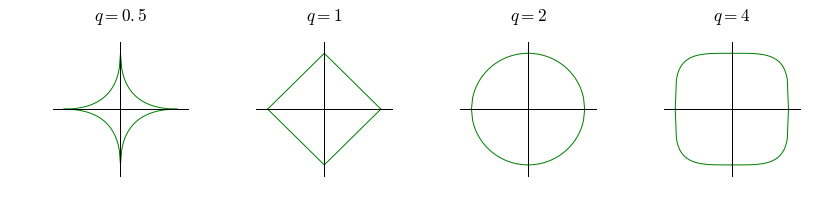

In [2]:
_, axes = plt.subplots(1, 4, figsize=(14, 3))

qq = [0.5, 1, 2, 4]

for q, ax in zip(qq, axes):
    ax.axis('off')
    xx = np.linspace(0, 1)
    yy = (1 - xx ** q) ** (1.0 / q)
    ax.plot(xx, yy, 'g',
            xx, -yy, 'g',
            -xx, yy, 'g',
            -xx, -yy, 'g')
    ax.plot([-1.2, 1.2], [0, 0], 'k')
    ax.plot([0, 0], [-1.2, 1.2], 'k')
    ax.set_title('$q={}$'.format(q), fontsize='xx-large')
    
plt.show()

$q=1$ 的情况在统计中又叫做 `lasso`。

当 $\lambda$ 足够大的时候，某些系数 $w_j$ 被强制趋于 0，这使得我们的模型趋于稀疏。

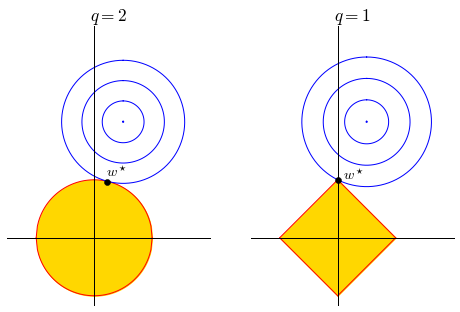

In [3]:
_, axes = plt.subplots(1, 2, figsize=(8, 5))

qq = [2, 1]
rr = [np.sqrt(4.25)-1, np.sqrt(1.25)]
for q, ax, r in zip(qq, axes, rr):
    ax.axis('equal')
    xx = np.linspace(0, 1)
    yy = (1 - xx ** q) ** (1.0 / q)
    ax.plot(xx, yy, 'r',
            xx, -yy, 'r',
            -xx, yy, 'r',
            -xx, -yy, 'r')
    
    ax.fill_between(xx, yy, -yy, color='gold')
    ax.fill_between(-xx, yy, -yy, color='gold')
    
    tt = np.linspace(0, 2 * np.pi, 100)
    for t in np.linspace(0.01, r, 4):
        ax.plot(0.5 + t * np.sin(tt), 2 + t * np.cos(tt), 'b')
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
    ax.set_xlim([-1.5, 2])
    ax.set_ylim([-1.5, 4])
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title('$q={}$'.format(q), fontsize='xx-large')
    
axes[0].text(0.2, 1.05, r'$w^\star$', fontsize='x-large')
axes[1].text(0.1, 1, r'$w^\star$', fontsize='x-large')

axes[0].plot(0.22, 0.97, 'ko')
axes[1].plot(0, 1, 'ko')

plt.show()

## 3.1.5 多维输出

之前我们考虑的是一维目标的情况，现在假设目标是 $K(K>1)$ 维的，记为 $\bf t$。

最简单的想法，我们考虑对于 $\bf t$ 的每个分量使用一组不同的基函数，即将这个问题拆分为 $K$ 个独立的回归问题。

不过更通常的做法是，我们使用同一组基函数来对所有的分量进行建模：

$$
\bf y(x,w)=W^\top\phi(x)
$$

其中 $\bf y$ 是 $K$ 维向量，$\bf W$ 是 $M\times K$ 的参数矩阵，$\bf \phi(x)$ 是 $M$ 维基函数向量，每个元素为 $\mathbf\phi_j(\mathbf x)$，且 $\mathbf\phi_0(\mathbf x)=1$。

### 概率建模

我们考虑使用独立同分布的高斯分布对目标向量的条件分布进行建模：

$$
p(\mathbf{t|x,W},\beta)={\mathcal N}({\bf t|W^\top\phi(x)},\beta^{-1}\mathbf I)
$$

假设我们有 $N$ 个观测值 $\mathbf t_1, \cdots, \mathbf t_N$，将转置后按行合并为一个 $N \times K$ 的矩阵 $\bf T$，即矩阵的第 $n$ 行为 $\mathbf t_n^\top$。类似的，我们将输入 $\mathbf x_1, \cdots, \mathbf x_N$ 合并为一个矩阵 $\bf X$。

对数似然为

$$
\begin{aligned}
\ln p(\mathbf T|\mathbf X,\mathbf W,\beta) & 
= \sum_{n=1}^N \ln \mathcal N({\mathbf t_n|\mathbf W^\top\mathbf \phi(\mathbf x_n)},\beta^{-1}\mathbf I) \\
& = \frac{NK}{2} \ln\left(\frac{\beta}{2\pi}\right) - \frac{\beta}{2} \sum_{n=1}^N\left\|\mathbf t_n - \mathbf W^\top \mathbf\phi(\mathbf x_n)\right\| 
\end{aligned}
$$

不难得出，$W$ 的最大似然解为：

$$
\mathbf W_{ML}=(\mathbf{\Phi^\top\Phi})^{-1} \mathbf{\Phi^\top T}
$$

对于单个分量 $t_k$，我们有：

$$
\mathbf w_{k}=(\mathbf{\Phi^\top\Phi})^{-1} \mathbf{\Phi^\top} \mathsf t_k = \mathbf\Phi^\dagger \mathsf t_k 
$$

与我们一维输出的结果一致。